**2. Image Augmentation**

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, vertical_flip=True,zoom_range=0.2)

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [8]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


**3. Create Model**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [10]:
model = Sequential()

**4. Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden
Layers),Output)**

In [11]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (64,64,3)))

In [12]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(300, activation='relu'))

In [15]:
model.add(Dense(300, activation='relu'))

In [16]:
model.add(Dense(5, activation="softmax"))

**5. Compile The Model**

In [17]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

**6. Fit The Model**

In [18]:
len(x_train)

180

In [19]:
model.fit(x_train, epochs = 5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5
180/180 [==============================] - 68s 376ms/step - loss: 1.3861 - accuracy: 0.4376 - val_loss: 1.1033 - val_accuracy: 0.5541
Epoch 2/5
180/180 [==============================] - 67s 374ms/step - loss: 1.0869 - accuracy: 0.5645 - val_loss: 1.1731 - val_accuracy: 0.5471
Epoch 3/5
180/180 [==============================] - 69s 381ms/step - loss: 1.0150 - accuracy: 0.5976 - val_loss: 0.9863 - val_accuracy: 0.6013
Epoch 4/5
180/180 [==============================] - 69s 381ms/step - loss: 0.9401 - accuracy: 0.6273 - val_loss: 0.9974 - val_accuracy: 0.6252
Epoch 5/5
180/180 [==============================] - 69s 382ms/step - loss: 0.8978 - accuracy: 0.6486 - val_loss: 0.8824 - val_accuracy: 0.6599


**7. Save The Model**

In [20]:
model.save("flowers.h5")

**8. Test The Model**

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [22]:
model = load_model("/content/drive/MyDrive/Dataset/flowers.h5")

In [25]:
img = image.load_img("/content/drive/MyDrive/Dataset/flowers/rose/1813435848_7852708394_n.jpg",target_size=(64,64))

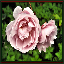

In [26]:
img

In [27]:
x = image.img_to_array(img)

In [28]:
x

array([[[ 35.,  52.,  34.],
        [ 29.,  42.,  25.],
        [ 33.,  47.,  24.],
        ...,
        [ 31.,  45.,  22.],
        [ 22.,  41.,  21.],
        [ 39.,  48.,  29.]],

       [[ 31.,  31.,  19.],
        [100.,  17.,  27.],
        [100.,  16.,  14.],
        ...,
        [102.,  18.,  16.],
        [105.,  18.,  27.],
        [ 27.,  35.,  22.]],

       [[ 32.,  40.,  27.],
        [  7.,  33.,   8.],
        [ 11.,  18.,   2.],
        ...,
        [ 10.,  17.,   1.],
        [ 10.,  31.,  14.],
        [ 30.,  41.,  24.]],

       ...,

       [[ 23.,  39.,  26.],
        [  6.,  37.,   6.],
        [ 16.,  31.,   8.],
        ...,
        [  8.,  35.,   4.],
        [ 11.,  29.,   3.],
        [ 26.,  40.,  23.]],

       [[ 31.,  45.,  30.],
        [ 81.,   1.,  10.],
        [ 65.,   1.,   0.],
        ...,
        [ 64.,   0.,   0.],
        [ 77.,   0.,   2.],
        [ 25.,  48.,  30.]],

       [[ 35.,  50.,  29.],
        [ 28.,  52.,  30.],
        [ 31.,  

In [31]:
model.predict(x)

ValueError: ignored

In [32]:
x.ndim

3

In [35]:
x = np.expand_dims(x,axis=0)

In [36]:
x.ndim

4

In [37]:
pred = model.predict(x)

In [38]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [39]:
labels = ["daisy","dandelion","rose","sunflower","tulip"]

In [40]:
labels[np.argmax(pred)]

'rose'